In [224]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import math
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, classification_report
from tqdm import tqdm
import seaborn as sns
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D
from dataclasses import dataclass
from typing import List

In [2]:
from google.colab import files

uploaded = files.upload()

Saving default of credit card clients.xls to default of credit card clients.xls


In [229]:
# read data
df = pd.read_excel("default of credit card clients.xls")

In [230]:
df.columns = df.iloc[0]
df = df.drop(0)
df = df.drop('ID', axis=1) # droping ID column
df = df.apply(pd.to_numeric, errors='coerce') # converting data type to numerical

In [231]:
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [232]:
# features
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object', name=0)

In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

In [234]:
#data description
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


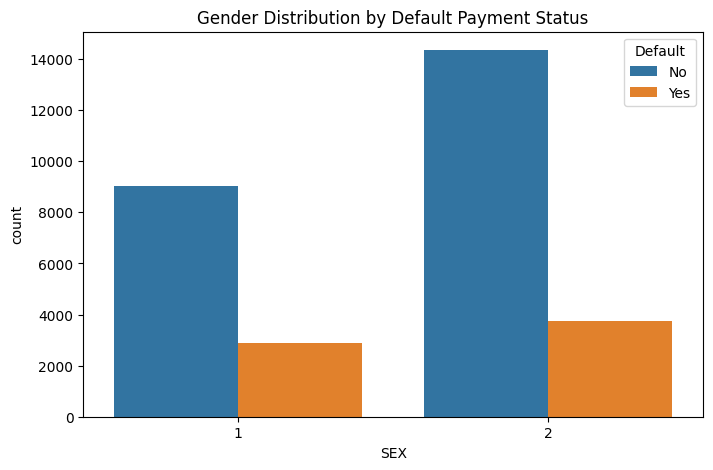

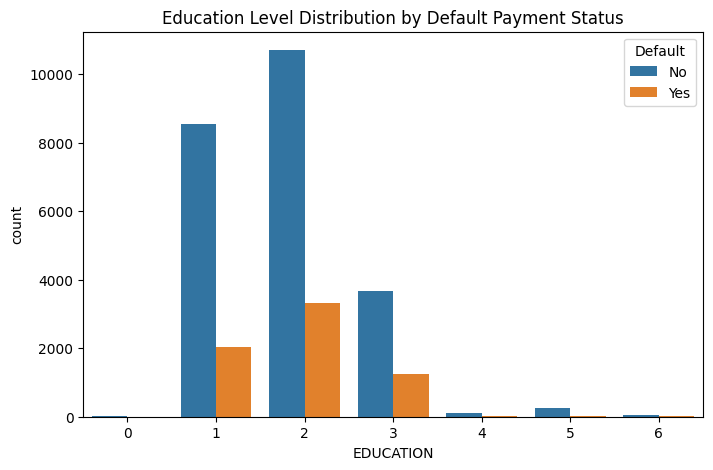

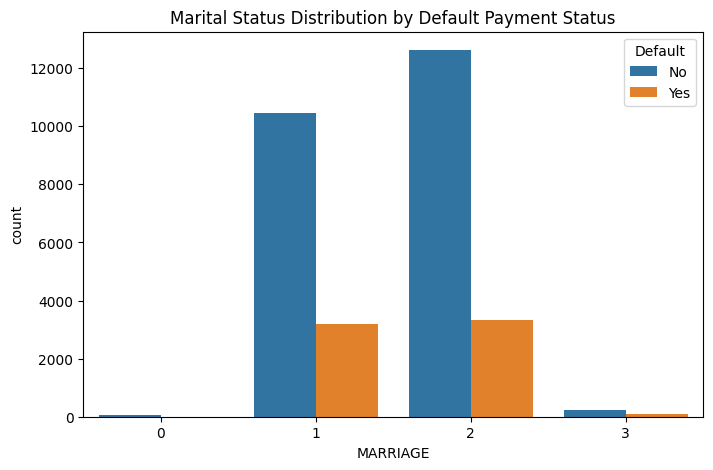

In [235]:
# Function to create a segmented count plot for a categorical column with respect to the default column
def plot_segmented_count(data, column, title):
    plt.figure(figsize=(8, 5))
    sns.countplot(x=column, hue='default payment next month', data=data)
    plt.title(title)
    plt.legend(title='Default', labels=['No', 'Yes'])
    plt.show()

# Creating segmented count plots for categorical variables with respect to the default payment column
plot_segmented_count(df, 'SEX', 'Gender Distribution by Default Payment Status')
plot_segmented_count(df, 'EDUCATION', 'Education Level Distribution by Default Payment Status')
plot_segmented_count(df, 'MARRIAGE', 'Marital Status Distribution by Default Payment Status')



Interpretation of Segmented Count Plots
1. Gender Distribution by Default Payment Status
Among both genders, the proportion of clients who did not default (coded as '0') is higher than those who defaulted (coded as '1').
The pattern of defaulting seems similar across both genders, with a slightly higher proportion of females not defaulting compared to males.
2. Education Level Distribution by Default Payment Status
Clients with university and graduate school education levels form the majority in both defaulting and non-defaulting groups.
Across all education levels, the proportion of non-defaulters is higher than defaulters.
The proportion of defaulters is slightly higher among clients with a high school education compared to those with higher education.
3. Marital Status Distribution by Default Payment Status
Single clients (coded as '2') have a higher proportion of non-defaulters compared to defaulters.
The pattern is similar for married clients (coded as '1'), though the difference between non-defaulters and defaulters is less pronounced.
For clients in the 'others' category of marital status, the numbers are too small to draw any definitive conclusions.
These visualizations indicate that while there are variations in default rates across different demographic groups, the majority of clients in each category did not default. Education level seems to have a noticeable impact on default rates, with those having higher education being less likely to default.

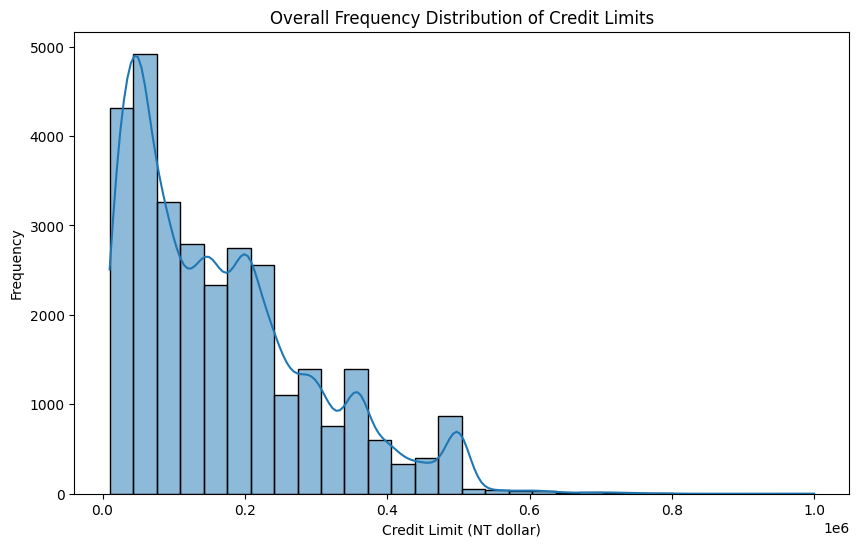

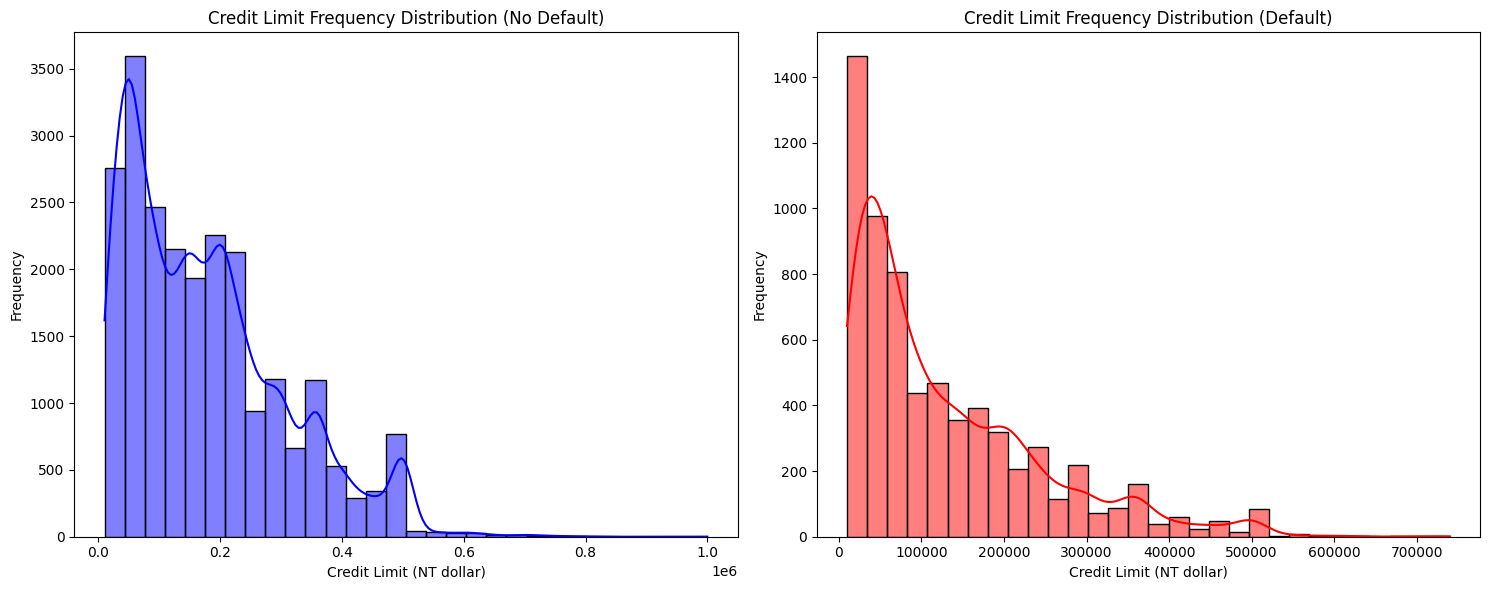

In [236]:
# Overall Frequency Plot for LIMIT_BAL
plt.figure(figsize=(10, 6))
sns.histplot(df['LIMIT_BAL'], bins=30, kde=True)
plt.title('Overall Frequency Distribution of Credit Limits')
plt.xlabel('Credit Limit (NT dollar)')
plt.ylabel('Frequency')
plt.show()

# Segmented Frequency Plots for LIMIT_BAL
plt.figure(figsize=(15, 6))

# Clients who did not default
plt.subplot(1, 2, 1)
sns.histplot(df[df['default payment next month'] == 0]['LIMIT_BAL'], bins=30, color='blue', kde=True)
plt.title('Credit Limit Frequency Distribution (No Default)')
plt.xlabel('Credit Limit (NT dollar)')
plt.ylabel('Frequency')

# Clients who defaulted
plt.subplot(1, 2, 2)
sns.histplot(df[df['default payment next month'] == 1]['LIMIT_BAL'], bins=30, color='red', kde=True)
plt.title('Credit Limit Frequency Distribution (Default)')
plt.xlabel('Credit Limit (NT dollar)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()



Interpretation of the Histograms
1. Overall Frequency Distribution of Credit Limits
The overall frequency plot shows that the distribution of credit limits is right-skewed, with a higher concentration of clients at lower credit limits.
There are peaks at certain credit limit values, indicating common credit limit amounts set by the credit institution.
2. Credit Limit Frequency Distribution (Segmented by Default Status)
No Default: The distribution of credit limits among clients who did not default is similar to the overall distribution, skewed towards lower credit limits. However, there is a noticeable presence of clients with higher credit limits in this group.
Default: For clients who defaulted, the distribution is more concentrated towards lower credit limits. This suggests that clients with lower credit limits were more likely to default.
These plots indicate that credit limits are a significant factor in default risk, with lower credit limits being more common among clients who defaulted. The frequency of defaults decreases as the credit limit increases.

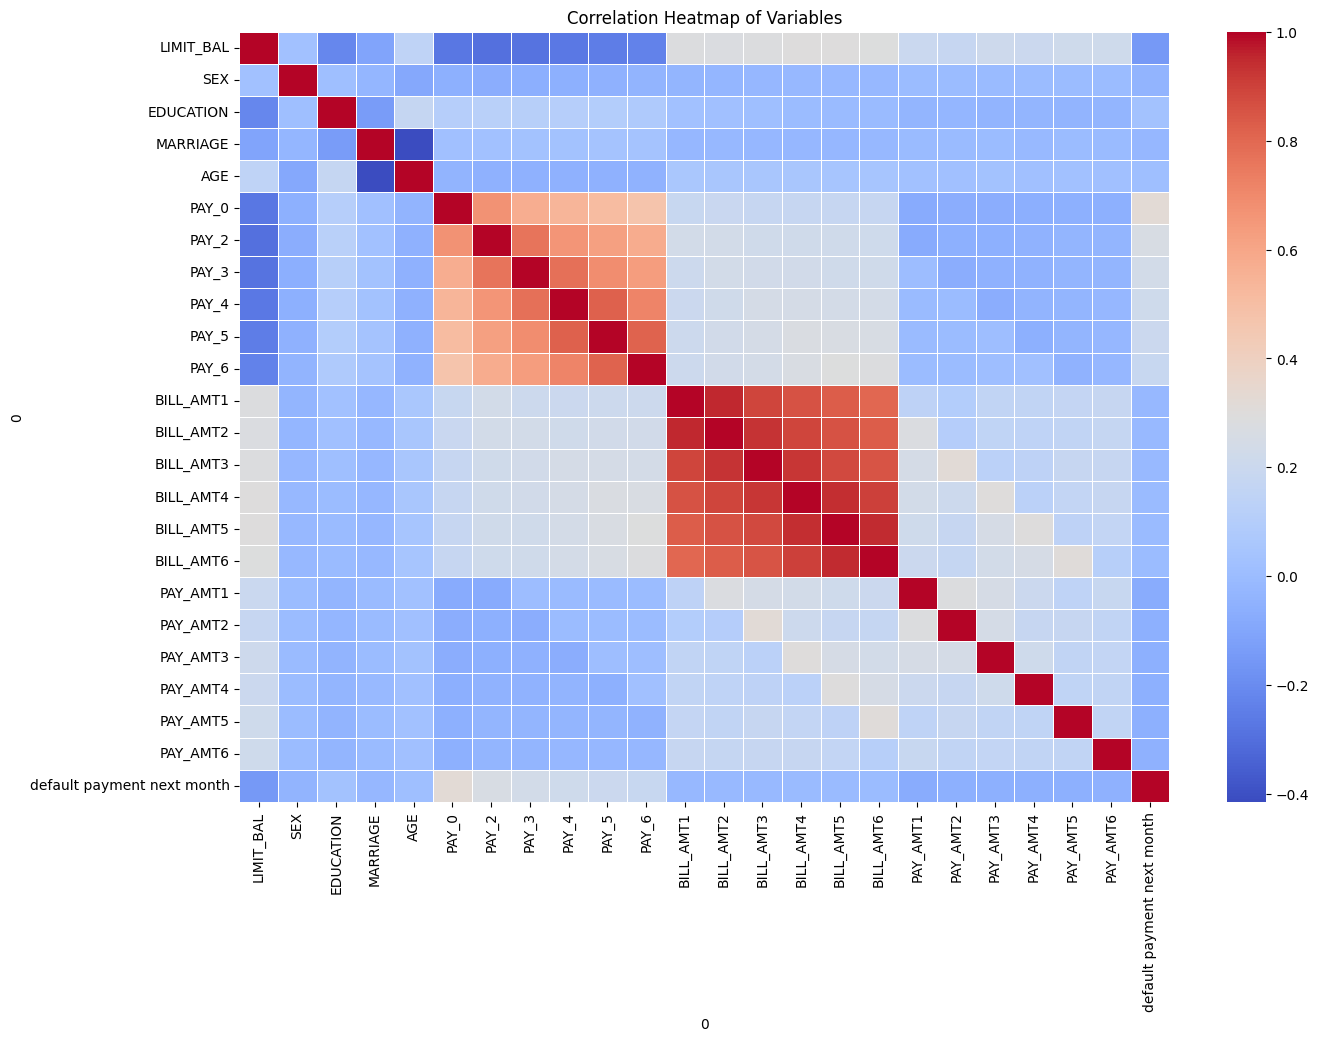

In [237]:
# Computing the correlation matrix
correlation_matrix = df.corr()

# Creating a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap of Variables')
plt.show()


Interpretation of the Correlation Heatmap
The heatmap displays the correlation coefficients between the variables in the dataset. Here are some key observations:

Strong Correlations: Darker red or blue colors indicate stronger positive or negative correlations, respectively.
Bill Statement Amounts (X12-X17): There are strong positive correlations among the bill statement amounts across different months (X12 to X17). This suggests that clients' bill amounts are relatively consistent over the observed period.
Repayment Statuses (X6-X11): The repayment status in different months (X6 to X11) also shows positive correlations with each other, indicating consistency in payment behavior over time.
Correlation with Default Payment: The 'default payment next month' variable shows some correlation with the repayment statuses, especially the most recent month (X6). This suggests that recent payment behavior is a significant indicator of default risk.
Credit Limit (X1): The credit limit (X1) shows a negative correlation with the default payment, implying that higher credit limits are associated with a lower likelihood of default.

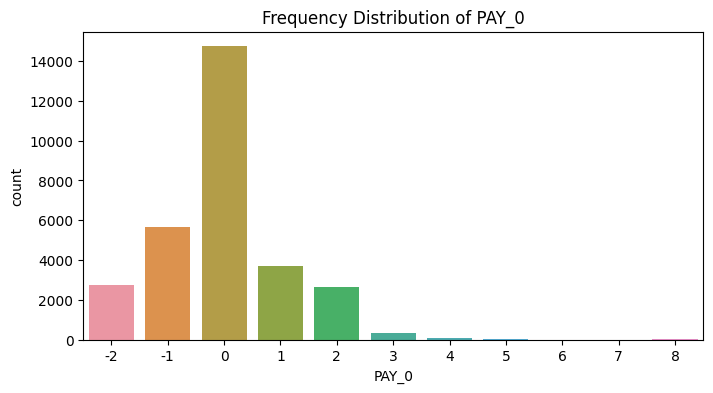

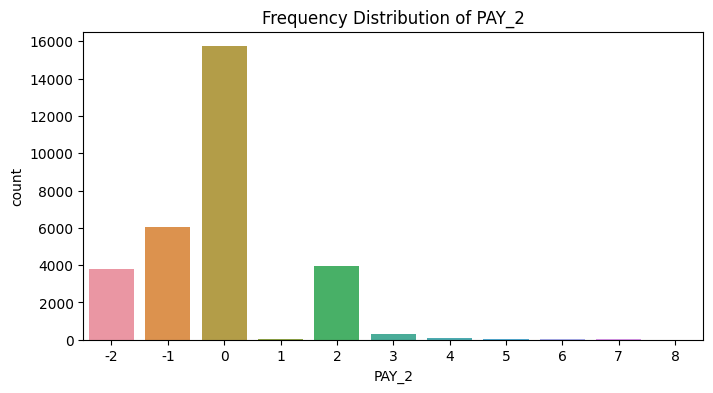

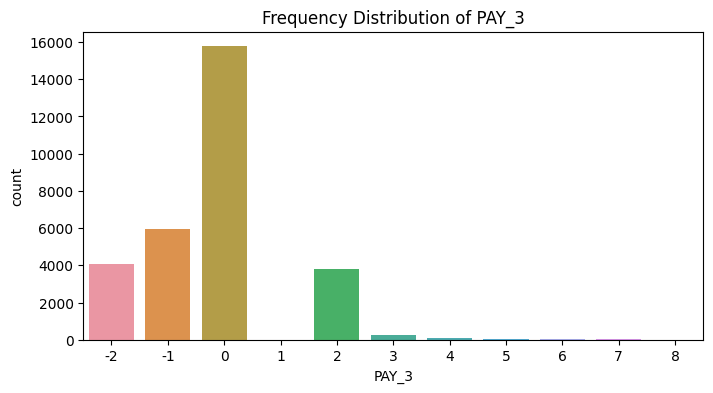

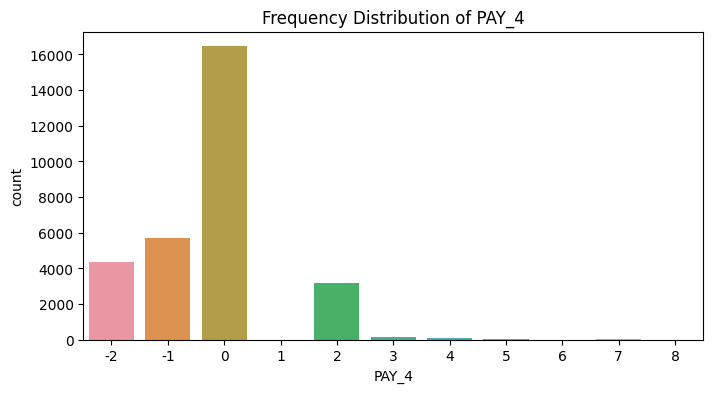

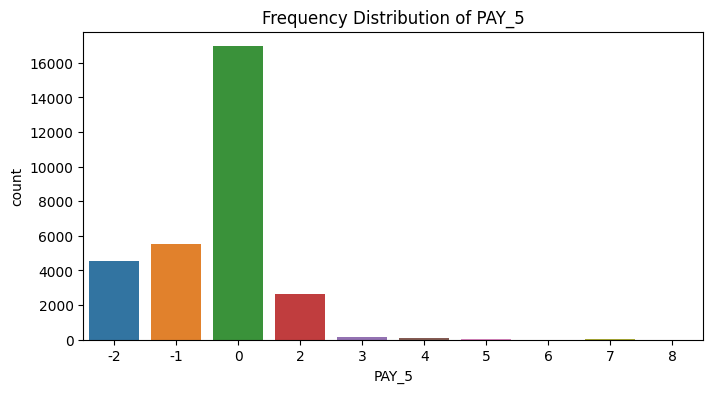

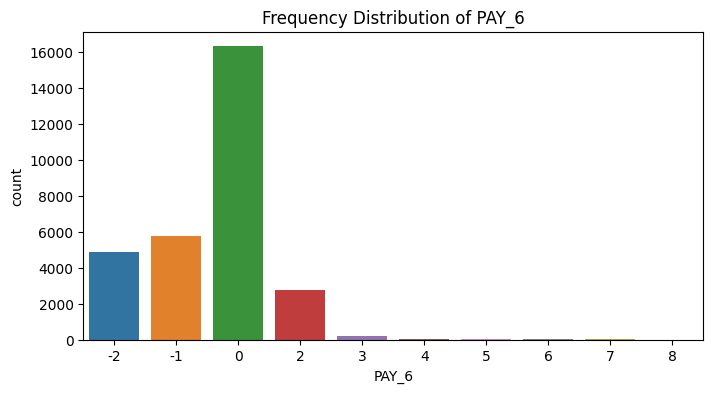

In [238]:
import seaborn as sns
import matplotlib.pyplot as plt
payment_status_columns = [ 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
# Frequency distribution for PAY_0 to PAY_6
for column in payment_status_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=column, data=df)
    plt.title(f'Frequency Distribution of {column}')
    plt.show()


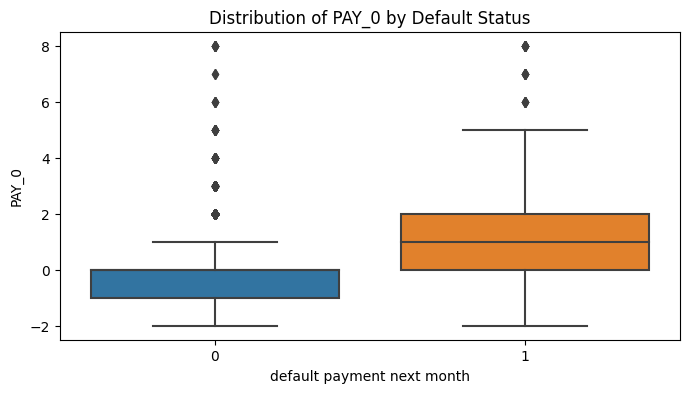

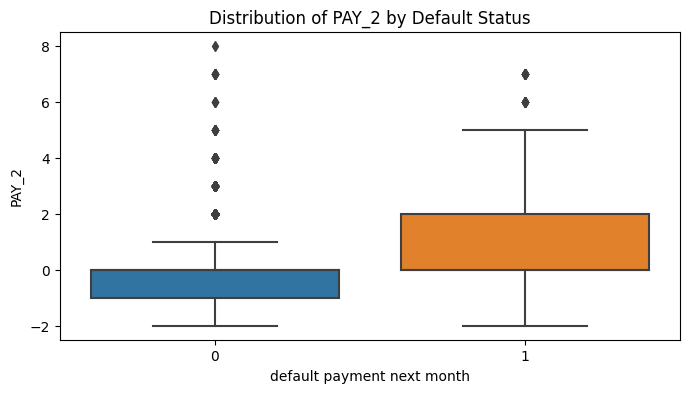

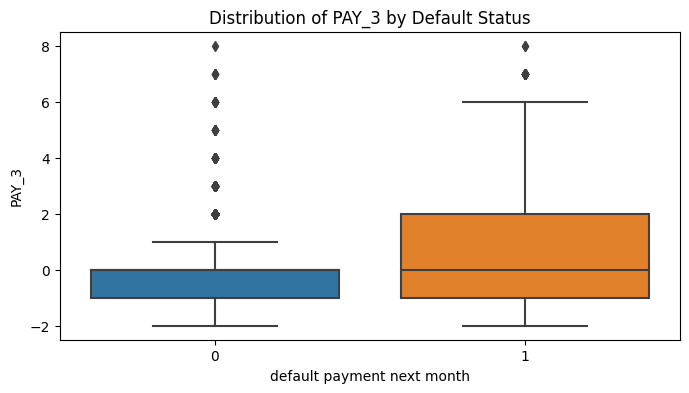

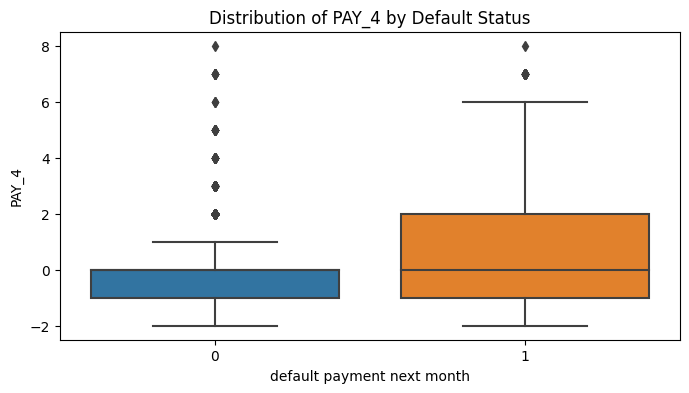

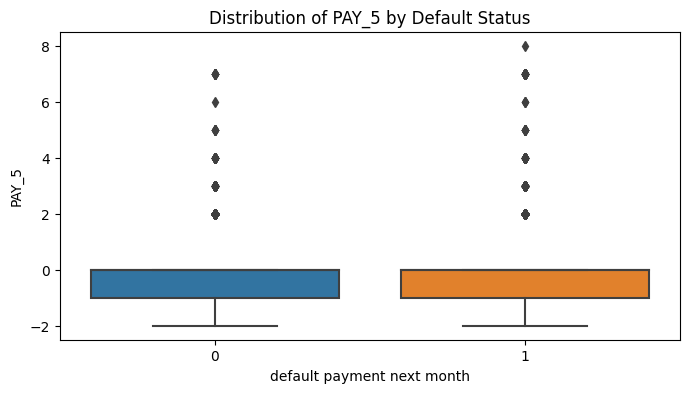

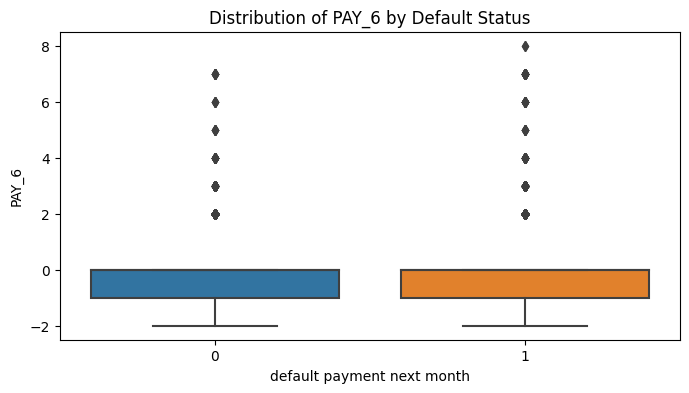

In [239]:
# Visual comparison of payment statuses for defaulters and non-defaulters
for column in payment_status_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='default payment next month', y=column, data=df)
    plt.title(f'Distribution of {column} by Default Status')
    plt.show()


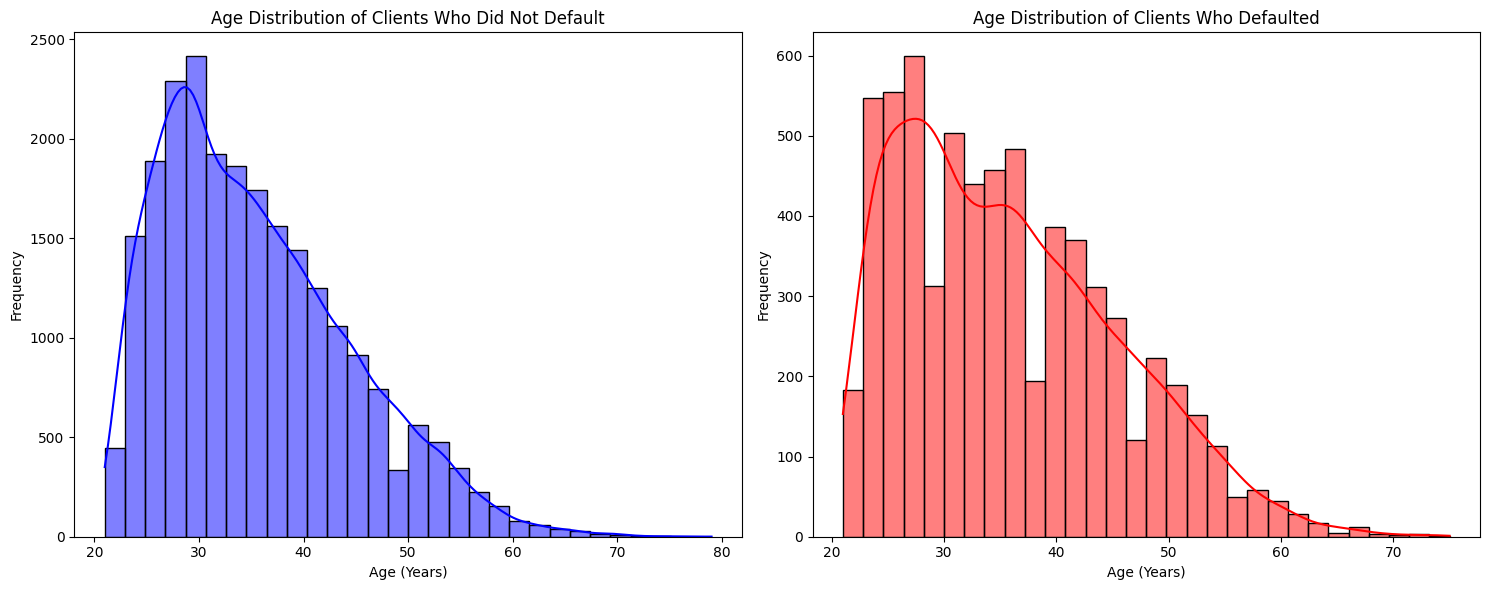

In [240]:
# Creating histograms for different default classes

# Setting up the figure
plt.figure(figsize=(15, 6))

# Histogram for clients who did not default
plt.subplot(1, 2, 1)
sns.histplot(df[df['default payment next month'] == 0]['AGE'], bins=30, color='blue', kde=True)
plt.title('Age Distribution of Clients Who Did Not Default')
plt.xlabel('Age (Years)')
plt.ylabel('Frequency')

# Histogram for clients who defaulted
plt.subplot(1, 2, 2)
sns.histplot(df[df['default payment next month'] == 1]['AGE'], bins=30, color='red', kde=True)
plt.title('Age Distribution of Clients Who Defaulted')
plt.xlabel('Age (Years)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()



The histograms provide a visual comparison of the age distribution between clients who did not default on their credit card payments and those who did.

Age Distribution of Clients Who Did Not Default (Blue Histogram):
The age distribution of clients who did not default is skewed towards the younger age groups, with a peak frequency in the late 20s to early 30s.
The distribution gradually tails off as age increases, indicating there are fewer older clients in this group.
The curve of the distribution is smooth, which may suggest a relatively uniform population of clients up to the peak age group, after which it decreases steadily.
Age Distribution of Clients Who Defaulted (Red Histogram):
The age distribution of clients who defaulted shows a similar skew towards younger ages, but the peak frequency is slightly less pronounced than in the non-defaulting group.
This distribution also tails off as age increases, but there seems to be a slightly higher frequency of middle-aged clients (around 35-50 years) in the defaulting group compared to the non-defaulting group.
The distribution curve appears a bit more erratic, with slight fluctuations rather than a smooth decrease.
Interpretation:
Both histograms suggest that younger clients are more prevalent in the dataset, regardless of default status.
The non-defaulting group appears to have a higher concentration of younger clients, while the defaulting group has a slightly broader age distribution, indicating that middle-aged clients are also represented in this group.
The higher frequency of defaults among the younger age groups could indicate that these clients might be at a higher financial risk due to lower income, less stability, or less experience managing credit.
The presence of older clients in the defaulting group might reflect different financial pressures such as retirement, healthcare costs, or supporting family members, which could affect their ability to maintain credit card payments

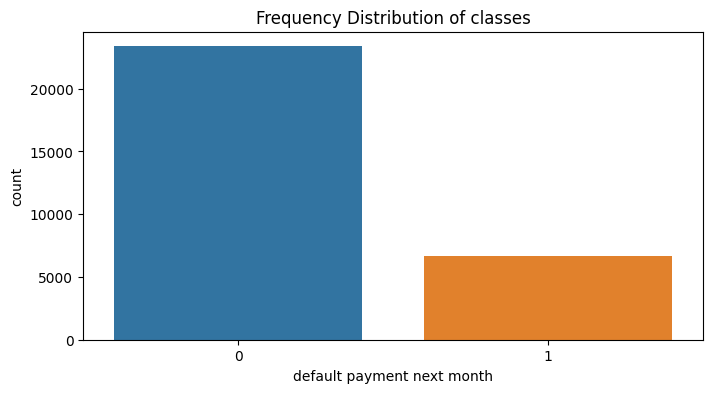

In [243]:
# distribution of tartget class
plt.figure(figsize=(8, 4))
sns.countplot(x='default payment next month', data=df)
plt.title(f'Frequency Distribution of classes')
plt.show()

In [242]:
payment_vars = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
for var in payment_vars:
    default_rate = df.groupby(var)['default payment next month'].mean()
    print(f'Default rate by {var}:\n{default_rate}\n')

Default rate by PAY_0:
PAY_0
-2    0.132294
-1    0.167781
 0    0.128113
 1    0.339479
 2    0.691414
 3    0.757764
 4    0.684211
 5    0.500000
 6    0.545455
 7    0.777778
 8    0.578947
Name: default payment next month, dtype: float64

Default rate by PAY_2:
PAY_2
-2    0.182708
-1    0.159669
 0    0.159123
 1    0.178571
 2    0.556150
 3    0.616564
 4    0.505051
 5    0.600000
 6    0.750000
 7    0.600000
 8    0.000000
Name: default payment next month, dtype: float64

Default rate by PAY_3:
PAY_3
-2    0.185312
-1    0.155945
 0    0.174512
 1    0.250000
 2    0.515580
 3    0.575000
 4    0.578947
 5    0.571429
 6    0.608696
 7    0.814815
 8    0.666667
Name: default payment next month, dtype: float64

Default rate by PAY_4:
PAY_4
-2    0.192502
-1    0.158959
 0    0.183288
 1    0.500000
 2    0.523267
 3    0.611111
 4    0.666667
 5    0.514286
 6    0.400000
 7    0.827586
 8    0.500000
Name: default payment next month, dtype: float64

Default rate by PAY_5:
P

In [244]:
# Mapping -2 to 0, -1 to 1, and incrementing other values by 2
for col in ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']:
    df[col] = df[col].apply(lambda x: 0 if x == -2 else 1 if x == -1 else x + 2)
print(df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].head())

0  PAY_0  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6
1      4      4      1      1      0      0
2      1      4      2      2      2      4
3      2      2      2      2      2      2
4      2      2      2      2      2      2
5      1      2      1      2      2      2


In [245]:
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,1,24,4,4,1,1,0,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,1,4,2,2,2,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,2,2,2,2,2,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,2,2,2,2,2,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,1,2,1,2,2,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,2,2,2,2,2,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,1,1,1,1,2,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,6,5,4,1,2,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,80000,1,3,1,41,3,1,2,2,2,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [246]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object', name=0)

In [247]:
# columns with continuous numerical data
df_1_continous = ['LIMIT_BAL','BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

In [248]:
# remove outliers
def trim_outliers(df, continuous_columns):
    trimmed_df = df.copy()

    for column in continuous_columns:
        threshold = trimmed_df[column].quantile(0.99)
        trimmed_df = trimmed_df[trimmed_df[column] <= threshold]

    return trimmed_df

df_no_outliers = trim_outliers(df, df_1_continous)


In [249]:
df_no_outliers

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,1,24,4,4,1,1,0,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,1,4,2,2,2,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,2,2,2,2,2,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,2,2,2,2,2,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,1,2,1,2,2,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,80000,1,2,2,34,4,4,4,4,4,...,77519,82607,81158,7000,3500,0,7000,0,4000,1
29996,220000,1,3,1,39,2,2,2,2,2,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,1,1,1,1,2,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,6,5,4,1,2,...,20878,20582,19357,0,0,22000,4200,2000,3100,1


In [250]:
# normalize data
def normalize_data(data, columns_to_normalize):
    mean = np.mean(data[columns_to_normalize], axis =0)
    std = np.std(data[columns_to_normalize], axis = 0)
    data[columns_to_normalize] = (data[columns_to_normalize] - mean)/std
    return data

df_new = normalize_data(data = df_no_outliers, columns_to_normalize=df_1_continous)

In [251]:
df_new

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,-1.102624,2,2,1,24,4,4,1,1,0,...,-0.798707,-0.779408,-0.760014,-0.627555,-0.491104,-0.579791,-0.547128,-0.569940,-0.509540,1
2,-0.248883,2,2,2,26,1,4,2,2,2,...,-0.712157,-0.682554,-0.666810,-0.627555,-0.436856,-0.392535,-0.353073,-0.569940,-0.152876,1
3,-0.505005,2,2,2,34,2,2,2,2,2,...,-0.419625,-0.360372,-0.315603,-0.364655,-0.349641,-0.392535,-0.353073,-0.363508,0.382121,0
4,-0.846502,2,2,1,37,2,2,2,2,2,...,-0.049748,0.032397,0.084479,-0.281179,-0.259111,-0.355084,-0.333668,-0.349264,-0.331208,0
5,-0.846502,1,2,1,57,1,2,1,2,2,...,-0.244805,-0.242690,-0.213225,-0.281179,5.787003,1.292768,1.199367,-0.427708,-0.388452,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,-0.590380,1,2,2,34,4,4,4,4,4,...,1.251818,1.536307,1.559589,0.584762,-0.000780,-0.579791,0.811257,-0.569940,0.203789,1
29996,0.604857,1,3,1,39,2,2,2,2,2,...,1.529166,0.096256,-0.303284,0.844544,2.877326,0.357050,0.044158,0.462223,-0.331208,0
29997,0.007239,1,3,2,43,1,1,1,1,2,...,-0.561196,-0.633917,-0.760014,-0.309408,0.003756,1.105138,-0.522095,-0.569940,-0.509540,0
29998,-1.017250,1,2,2,37,6,5,4,1,2,...,-0.246445,-0.202434,-0.206765,-0.627555,-0.611287,3.539838,0.267903,-0.157075,0.043290,1


In [252]:
# Logistic Regression Class
class LogisticRegression:

    def __init__(self, X, y, learning_rate, max_iteration, epsilon, lamda = 0.0, alpha = 0.0, SGD = False)  -> None:
        self.X = X # feature matrix
        self.y = y # target variable
        self.learning_rate = learning_rate # learning rate for gradient descent
        self.epsilon = epsilon # convergence threshold
        self.max_iteration = max_iteration # maximum number of iterations
        self.lamda =lamda # L2 regularization parameter
        self.alpha = alpha # L1 regularization parameter
        self.SGD = SGD # stochastic gradient descent

# split data
    def split_data(self):
        X_train, X_test, y_train, y_test = train_test_split(self.X, self.y, test_size = 0.3, shuffle = True)
        return X_train, X_test, y_train, y_test
# add bias term
    def add_X0(self, X):
        return np.column_stack([np.ones([X.shape[0],1]), X])

# sigmoid
    def sigmoid(self, X):
        sig = 1/(1 + np.exp(-X.dot(self.theta)))
        return sig

# cost function
    def cost_function(self, X, y):
        p_yi = self.sigmoid(X)
        # L2 regularization term
        if self.lamda != 0:
           reg_term = (self.lamda / (2 * X.shape[0])) * np.sum(self.theta[1:]**2)

        # L1 regularization term
        if self.alpha != 0:
           reg_term = self.alpha * np.sum(np.abs(self.theta[1:]))

        if self.lamda == 0 and self.alpha == 0:
           reg_term = 0

        cost = (1 / X.shape[0]) * (y.dot(np.log(p_yi+1e-10)) +
               (1 - y).dot(np.log(1 - p_yi+1e-10))) + reg_term

        return -cost.sum()

# cost derivative
    def cost_derivative(self, X, y):
        sig = self.sigmoid(X)
        grad = (sig - y).dot(X)

        # L2 regularization term
        if self.lamda != 0:
           reg_term = (self.lamda / X.shape[0]) * np.concatenate(([0], self.theta[1:]))

        # L1 regularization term
        if self.alpha != 0:
           reg_term = self.alpha * np.sign(self.theta)  # L1 regularization term

        if self.lamda == 0 and self.alpha == 0:
           reg_term = 0

        grad += reg_term
        return grad

# gradient descent
    def gradient_descent(self, X, y):
        errors = []
        prev_error = float('inf')
        for i in tqdm(range(self.max_iteration), colour = 'red'):
            self.theta -= self.learning_rate*self.cost_derivative(X, y)
            error = self.cost_function(X, y)
            errors.append(error)
            if abs(prev_error - error) < self.epsilon:
                print("stopped learning")
                break
            prev_error = error
        self.plot_cost(errors)

# stochastic gradient descent
    def stochastic_gradient_descent(self, X, y):
        errors = []
        prev_error = float('inf')
        l = len(y)
        y = y.values

        for i in tqdm(range(self.max_iteration), colour='red'):
            indices = np.random.choice(l, size=50, replace=False)
            X_batch = X[indices]
            y_batch = y[indices]
            self.theta -= self.learning_rate * self.cost_derivative(X_batch, y_batch)

            error = self.cost_function(X, y)
            errors.append(error)

            if abs(prev_error - error) < self.epsilon:
                print("stopped learning")
                break
            prev_error = error
        self.plot_cost(errors)

    def fit(self):
        self.X_train, self.X_test, self.y_train, self.y_test = self.split_data()
        self.X_train = self.add_X0(self.X_train)
        self.theta = np.ones(self.X_train.shape[1])
        if self.SGD:
          self.stochastic_gradient_descent(self.X_train, self.y_train)
        else:
          self.gradient_descent(self.X_train, self.y_train)

# plot of cost function
    def plot_cost(self,cost_sequence):

        s = np.array(cost_sequence)
        t = np.arange(s.size)

        fig, ax = plt.subplots()
        ax.plot(t,s)

        ax.set(xlabel = 'iterations', ylabel = 'cost' , title = 'cost trend')
        ax.grid()
        plt.legend(bbox_to_anchor=(1.05,1), loc=2,shadow=True)
        plt.show()

# Return binary predictions (0 or 1) based on the learned parameters
    def predict(self, X):

        X = self.add_X0(X)
        probabilities = self.sigmoid(X)
        predictions = (probabilities >= 0.5).astype(int)
        return predictions

# Calculate the accuracy of the model
    def accuracy(self, y_true, y_pred):

        correct_predictions = np.sum(y_true == y_pred)
        total_examples = len(y_true)
        accuracy = correct_predictions / total_examples
        return accuracy

# evaluate train data
    def evaluate_train(self):
        y_train_pred = self.predict(self.X_train[:, 1:])
        train_acc = self.accuracy(self.y_train, y_train_pred)

        print("Training accuracy = ", str(train_acc))

# evaluate test data
    def evaluate_test(self):

        y_pred = self.predict(self.X_test)
        acc = self.accuracy(self.y_test, y_pred)

        print("accuracy = ", str(acc))

        conf_matrix = confusion_matrix(self.y_test, y_pred)
        print("Confusion Matrix:\n", conf_matrix)

        class_report = classification_report(self.y_test, y_pred)
        print("Classification Report:\n", class_report)

 26%|██▌       | 12819/50000 [00:56<02:45, 225.12it/s]


stopped learning


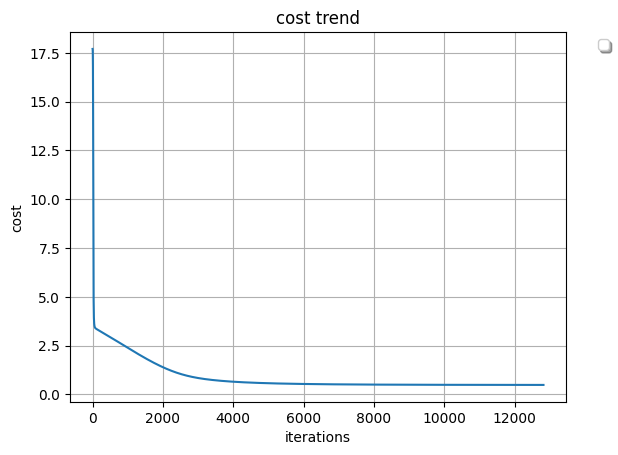

Training accuracy =  0.7914727843307001
accuracy =  0.7936127240595809
Confusion Matrix:
 [[5932  173]
 [1462  355]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.97      0.88      6105
           1       0.67      0.20      0.30      1817

    accuracy                           0.79      7922
   macro avg       0.74      0.58      0.59      7922
weighted avg       0.77      0.79      0.75      7922



In [253]:
# fit model
lr_1 = LogisticRegression(X =  df_new.iloc[:,:-1], y = df_new.iloc[:, -1], epsilon=0.000001, learning_rate=0.0000001, max_iteration=50000)
lr_1.fit()
lr_1.evaluate_train()
lr_1.evaluate_test()

In [254]:
# principal component analysis
class PCA:

    def __init__(self, data) -> None:
        self.data = data # data

# eigenvalues, eigenvectors
    def eigen(self, data):
        covariance = np.cov(data.T)
        eigenvalues, eigenvectors = np.linalg.eig(covariance)
        return eigenvalues, eigenvectors

# select components
    def select_eigenvectors(self, eigenvalues ,eigenvectors, n):
        index  = np.argsort(eigenvalues)[::-1]
        eigenvectors = eigenvectors[index]
        selected_eigenvectors = eigenvectors[: n]
        return selected_eigenvectors

# sort eigenvalues
    def sort_eigenvalues(self, eigenvalues):
        index  = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[index]
        return eigenvalues

# project the data into specified lower dimension
    def project_data(self, n):
        eigenvalues, eigenvectors = self.eigen(self.data)
        components = self.select_eigenvectors(eigenvalues, eigenvectors,n)
        return np.dot(self.data, components.T)

# cumulative explained variance
    def cumulative_explained_variance(self):
        eigenvalues, eigenvectors = self.eigen(self.data)
        eigenvalues = self.sort_eigenvalues(eigenvalues)
        explained_variance = eigenvalues / np.sum(eigenvalues)
        cumulative_explained_variance = np.cumsum(explained_variance)
        return cumulative_explained_variance

# cumulative explained variance plot
    def cumulative_variance_plot(self, threshold=0.99):
        cumulative_variance = self.cumulative_explained_variance()
        plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
        plt.title('Cumulative Explained Variance')
        plt.xlabel('Number of Components')
        plt.ylabel('Cumulative Explained Variance')
        plt.show()

        # Find the most ideal n based on the threshold
        ideal_n = np.argmax(cumulative_variance >= threshold) + 1
        print(f"The most ideal n value for {threshold * 100}% cumulative explained variance is: {ideal_n}")
        return ideal_n

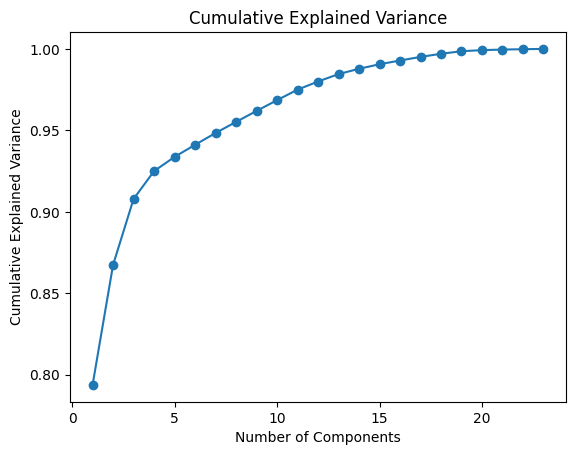

The most ideal n value for 99.0% cumulative explained variance is: 15


15

In [255]:
# apply PCA
pca = PCA(df_new.iloc[:, :-1])
pca.cumulative_variance_plot(threshold=0.99)

In [256]:
# convert data for the most ideal n
df2 = pca.project_data(15)

 57%|█████▋    | 5715/10000 [00:24<00:18, 236.12it/s]


stopped learning


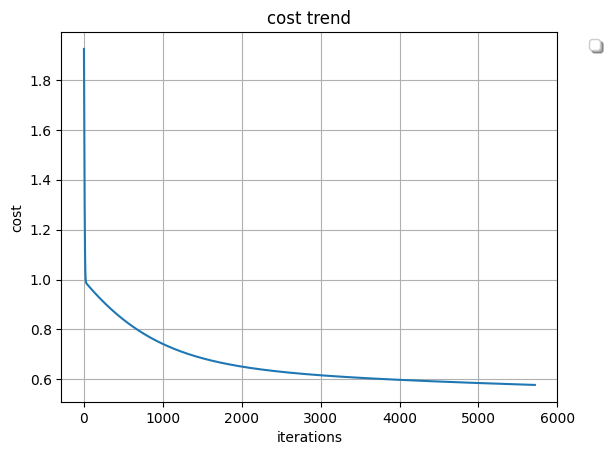

Training accuracy =  0.7677199437290336
accuracy =  0.7687452663468821
Confusion Matrix:
 [[5519  538]
 [1294  571]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.91      0.86      6057
           1       0.51      0.31      0.38      1865

    accuracy                           0.77      7922
   macro avg       0.66      0.61      0.62      7922
weighted avg       0.74      0.77      0.75      7922



In [257]:
# fit model to data after applying PCA
lr_1 = LogisticRegression(X =  df2[:,:-1], y = df_new.iloc[:, -1], epsilon=0.00001, learning_rate=0.0000001, max_iteration=10000)
lr_1.fit()
lr_1.evaluate_train()
lr_1.evaluate_test()

In [258]:
# converting into a balanced data set
def create_balanced_sample(df, target_col_index, size = 1.2):

    class_0_df = df[df.iloc[:, target_col_index] == 0]
    class_1_df = df[df.iloc[:, target_col_index] == 1]

    smaller_class_1 = int(len(class_1_df))
    smaller_class_0 = int(len(class_1_df)*size)
    # Randomly sample from each class to match the size of the smaller class
    class_0_sampled = class_0_df.sample(n=smaller_class_0, random_state=42)
    class_1_sampled = class_1_df.sample(n=smaller_class_1, random_state=42)

    # Combine the sampled classes to form the balanced dataframe
    balanced_df = pd.concat([class_0_sampled, class_1_sampled])

    # Identify the rows that were not included in the balanced sample
    excluded_df = df.drop(balanced_df.index)

    return balanced_df, excluded_df

balanced_df, excluded_df = create_balanced_sample(df_new, -1, size = 1.2)

 35%|███▍      | 17489/50000 [00:42<01:19, 408.83it/s]


stopped learning


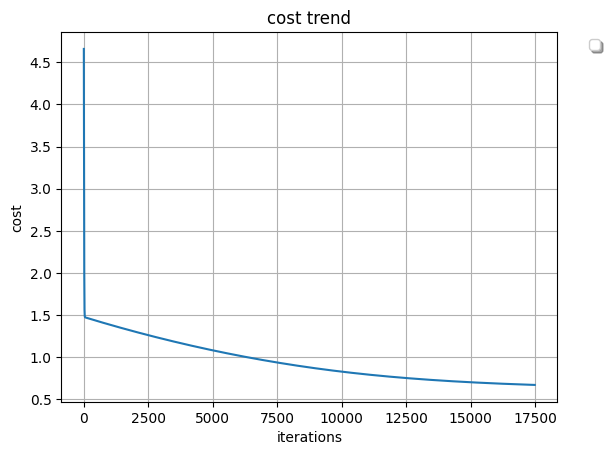

Training accuracy =  0.6013874066168623
accuracy =  0.5932287776947971
Confusion Matrix:
 [[1309  889]
 [ 745 1074]]
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.60      0.62      2198
           1       0.55      0.59      0.57      1819

    accuracy                           0.59      4017
   macro avg       0.59      0.59      0.59      4017
weighted avg       0.60      0.59      0.59      4017



In [263]:
# apply PCA on the new balanced dataset
pca = PCA(balanced_df.iloc[:, :-1])
df3 = pca.project_data(15)

# fit model to the balanced dataset
lr_1 = LogisticRegression(X =  df3, y = balanced_df.iloc[:, -1], epsilon=0.00001, learning_rate=0.0000001, max_iteration=50000)
lr_1.fit()
lr_1.evaluate_train()
lr_1.evaluate_test()

 31%|███       | 15617/50000 [00:36<01:19, 433.63it/s]


stopped learning


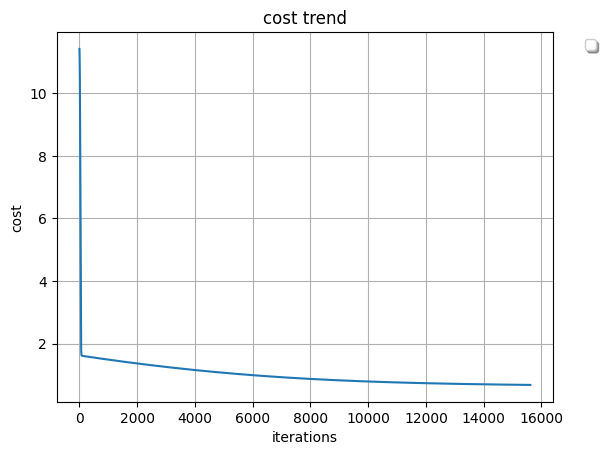

Training accuracy =  0.6003052001408616
accuracy =  0.6064092029580936
Confusion Matrix:
 [[1031  779]
 [ 658 1183]]
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.57      0.59      1810
           1       0.60      0.64      0.62      1841

    accuracy                           0.61      3651
   macro avg       0.61      0.61      0.61      3651
weighted avg       0.61      0.61      0.61      3651



In [266]:
balanced_df, excluded_df = create_balanced_sample(df_new, -1, size = 1)
pca = PCA(balanced_df.iloc[:, :-1])
df3 = pca.project_data(15)

# fit model to the balanced dataset
lr_1 = LogisticRegression(X =  df3, y = balanced_df.iloc[:, -1], epsilon=0.00001, learning_rate=0.0000001, max_iteration=50000)
lr_1.fit()
lr_1.evaluate_train()
lr_1.evaluate_test()

lamda =  0.01


 35%|███▍      | 17291/50000 [00:45<01:25, 380.43it/s]


stopped learning


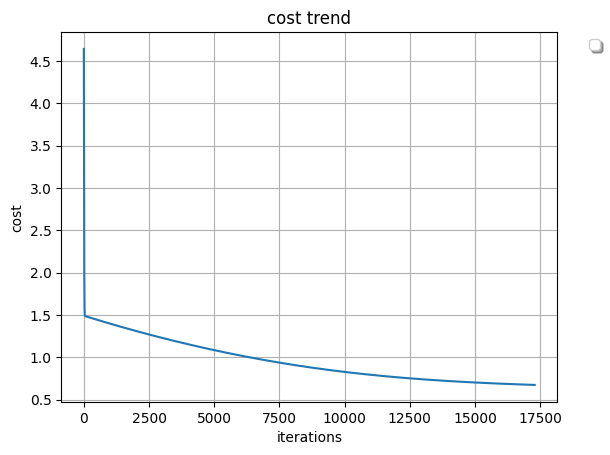

Training accuracy =  0.6018143009605122
accuracy =  0.6019417475728155
Confusion Matrix:
 [[1321  873]
 [ 726 1097]]
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.60      0.62      2194
           1       0.56      0.60      0.58      1823

    accuracy                           0.60      4017
   macro avg       0.60      0.60      0.60      4017
weighted avg       0.61      0.60      0.60      4017

lamda =  0.1


 35%|███▍      | 17338/50000 [00:47<01:29, 364.73it/s]


stopped learning


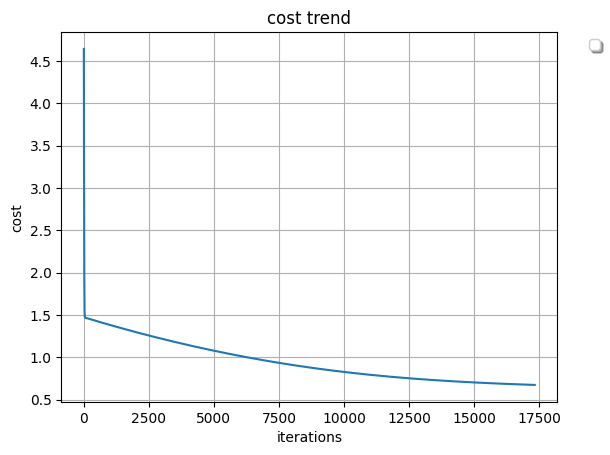

Training accuracy =  0.6014941302027749
accuracy =  0.5897435897435898
Confusion Matrix:
 [[1300  903]
 [ 745 1069]]
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.59      0.61      2203
           1       0.54      0.59      0.56      1814

    accuracy                           0.59      4017
   macro avg       0.59      0.59      0.59      4017
weighted avg       0.59      0.59      0.59      4017

lamda =  1


 35%|███▍      | 17430/50000 [00:44<01:22, 395.74it/s]


stopped learning


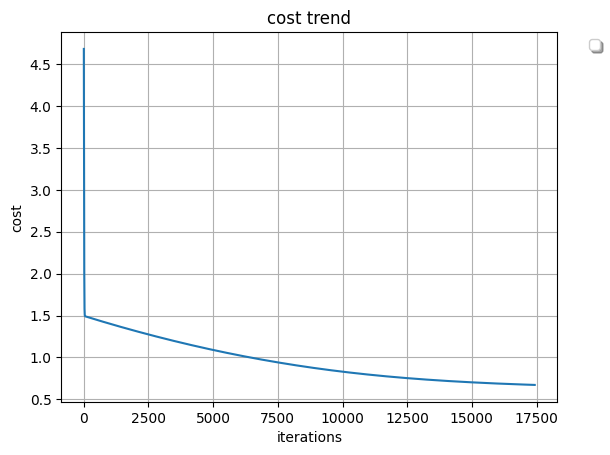

Training accuracy =  0.6007470651013874
accuracy =  0.6086631814787155
Confusion Matrix:
 [[1331  875]
 [ 697 1114]]
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.60      0.63      2206
           1       0.56      0.62      0.59      1811

    accuracy                           0.61      4017
   macro avg       0.61      0.61      0.61      4017
weighted avg       0.61      0.61      0.61      4017

lamda =  10


 34%|███▍      | 17222/50000 [00:42<01:20, 409.55it/s]


stopped learning


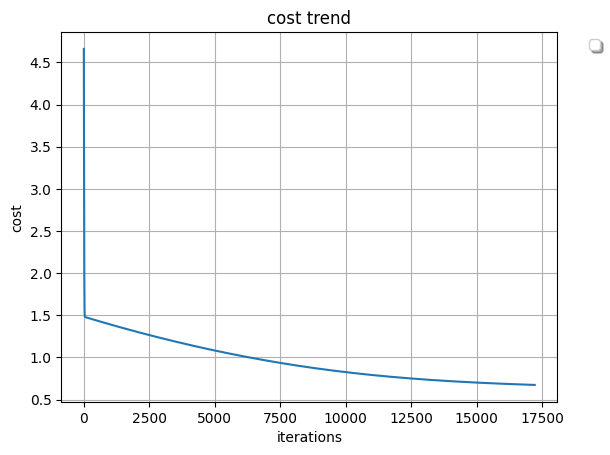

Training accuracy =  0.5966915688367129
accuracy =  0.6084142394822006
Confusion Matrix:
 [[1313  863]
 [ 710 1131]]
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.60      0.63      2176
           1       0.57      0.61      0.59      1841

    accuracy                           0.61      4017
   macro avg       0.61      0.61      0.61      4017
weighted avg       0.61      0.61      0.61      4017

lamda =  100


 34%|███▍      | 17143/50000 [00:45<01:27, 376.22it/s]


stopped learning


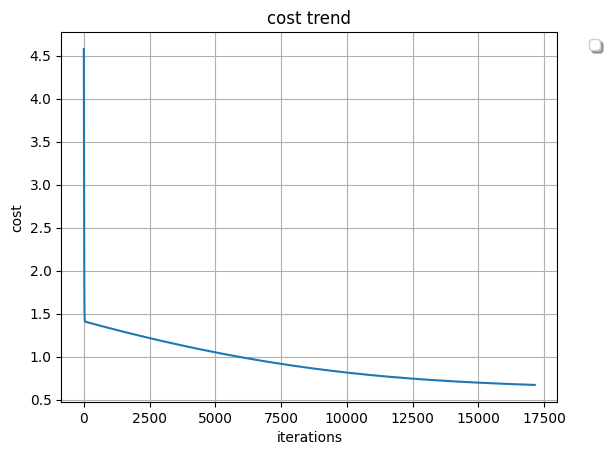

Training accuracy =  0.6010672358591249
accuracy =  0.5939756036843415
Confusion Matrix:
 [[1311  881]
 [ 750 1075]]
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.60      0.62      2192
           1       0.55      0.59      0.57      1825

    accuracy                           0.59      4017
   macro avg       0.59      0.59      0.59      4017
weighted avg       0.60      0.59      0.59      4017



In [262]:
# find the most ideal lamda(L2 regularisation parameter)
for i in [0.01, 0.1, 1, 10 ,100]:
  lr_1 = LogisticRegression(X =  df3, y = balanced_df.iloc[:, -1], epsilon=0.00001, learning_rate=0.0000001, max_iteration=50000, lamda = i)
  print("lamda = ", str(i))
  lr_1.fit()
  lr_1.evaluate_train()
  lr_1.evaluate_test()

alpha =  0.001


 34%|███▍      | 17229/50000 [00:44<01:23, 391.40it/s]


stopped learning


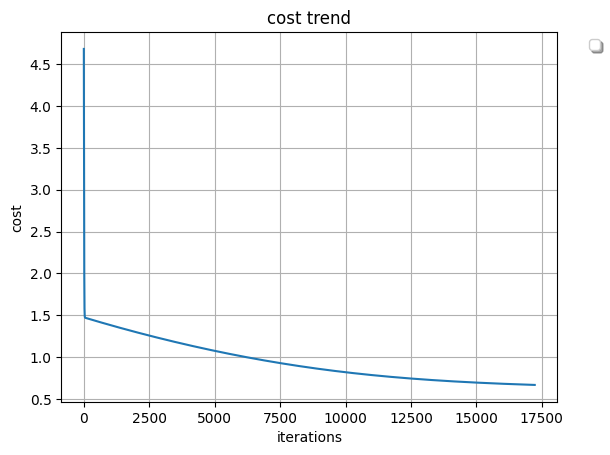

Training accuracy =  0.6
accuracy =  0.6016928055763007
Confusion Matrix:
 [[1306  909]
 [ 691 1111]]
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.59      0.62      2215
           1       0.55      0.62      0.58      1802

    accuracy                           0.60      4017
   macro avg       0.60      0.60      0.60      4017
weighted avg       0.61      0.60      0.60      4017

alpha =  0.01


 32%|███▏      | 16152/50000 [00:38<01:21, 414.23it/s]


stopped learning


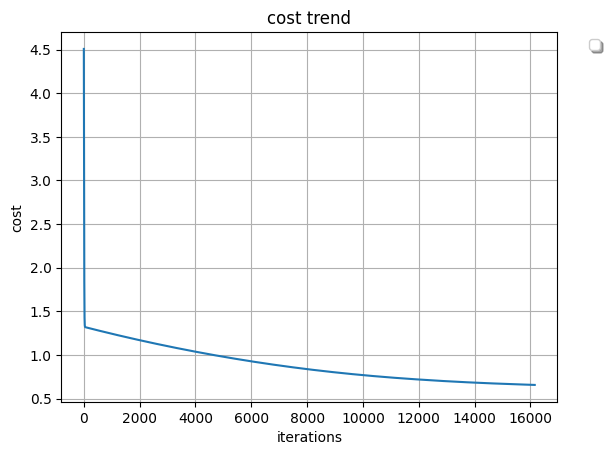

Training accuracy =  0.5898612593383138
accuracy =  0.5837689818272342
Confusion Matrix:
 [[1304  930]
 [ 742 1041]]
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.58      0.61      2234
           1       0.53      0.58      0.55      1783

    accuracy                           0.58      4017
   macro avg       0.58      0.58      0.58      4017
weighted avg       0.59      0.58      0.59      4017

alpha =  0.1


  0%|          | 59/50000 [00:00<01:41, 491.72it/s]


stopped learning


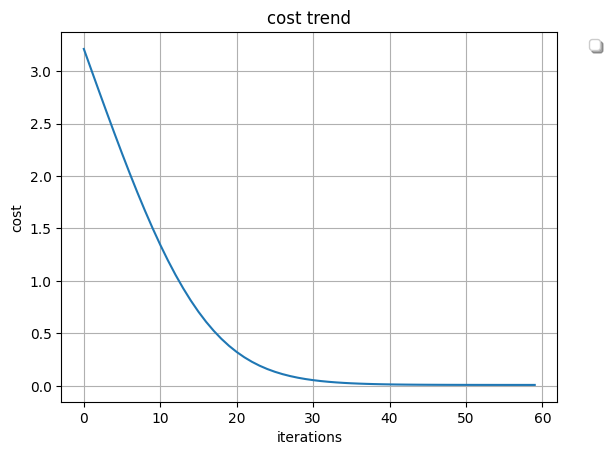

Training accuracy =  0.5066168623265742
accuracy =  0.5327358725416977
Confusion Matrix:
 [[1118 1092]
 [ 785 1022]]
Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.51      0.54      2210
           1       0.48      0.57      0.52      1807

    accuracy                           0.53      4017
   macro avg       0.54      0.54      0.53      4017
weighted avg       0.54      0.53      0.53      4017



In [264]:
# find the most ideal alpha(L1 regularisation parameter)
for i in [0.001, 0.01, 0.1]:
  lr_1 = LogisticRegression(X =  df3, y = balanced_df.iloc[:, -1], epsilon=0.00001, learning_rate=0.0000001, max_iteration=50000, alpha = i)
  print("alpha = ", str(i))
  lr_1.fit()
  lr_1.evaluate_train()
  lr_1.evaluate_test()

  8%|▊         | 3974/50000 [00:05<01:03, 720.37it/s]


stopped learning


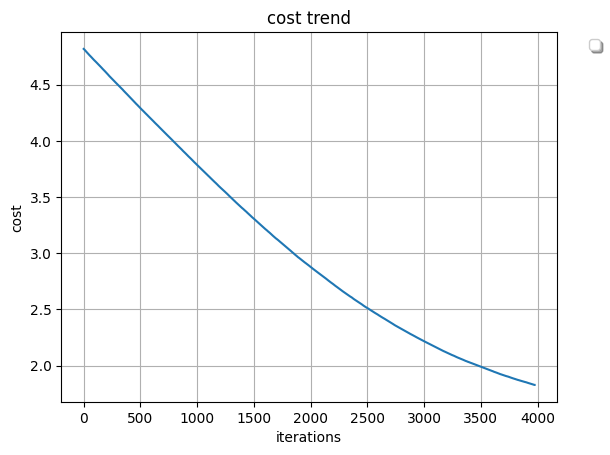

Training accuracy =  0.5422625400213447
accuracy =  0.5322379885486681
Confusion Matrix:
 [[1645  529]
 [1350  493]]
Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.76      0.64      2174
           1       0.48      0.27      0.34      1843

    accuracy                           0.53      4017
   macro avg       0.52      0.51      0.49      4017
weighted avg       0.52      0.53      0.50      4017



In [265]:
# fit stochastic gradient descent model
lr_1 = LogisticRegression(X =  df3, y = balanced_df.iloc[:, -1], epsilon=0.00001, learning_rate=0.0000001, max_iteration=50000, lamda = 0.1, SGD = True)
lr_1.fit()
lr_1.evaluate_train()
lr_1.evaluate_test()